**1. INTRODUCCION**

El precio de venta de las viviendas depende de muchos factores, como la superfície construida, el número de habitaciones o la situación en que se encuentra. El conjunto de datos que utilizado corresponde al dataset House Prices: Advanced Regression Techniques(https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  que es una de las competiciones de iniciación de Kaggle. Contiene 79 variables con información de casi cada aspecto de las casas residenciales en la ciudad de Ames, Iowa.

Aplicaremos métodos de estadística descriptiva y visualización de datos para ver qué variables están más relacionadas entre ellas y, en especial, con el precio de venta de una propiedad. Finalizaremos con diversos contrastes de hipótesis.

**2. LECTURA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Lo primero que haremos será importar los datos y ver qué contienen

In [2]:
df_houses = pd.read_csv('C:/Users/NITROPC/Desktop/DATA SCIENCE/CERTIFICACION MACHINE LEARNING/01 - ANALISIS EXPLORATORIO/5 - PROYECTO/data/train.csv')

In [3]:
df_houses.shape

(1460, 81)

Nuestro data frame tiene 1460 filas y 81 columnas

In [4]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**2.1 Diccionario de variables**

A continuación adjuntamos el diccionario de variables con la explicación de que indica cada una y el rango de valores que tiene en caso de ser categórica.

MSSubClass: Identifies the type of dwelling involved in the sale.

    20    1-STORY 1946 & NEWER ALL STYLES
    30    1-STORY 1945 & OLDER
    40    1-STORY W/FINISHED ATTIC ALL AGES
    45    1-1/2 STORY - UNFINISHED ALL AGES
    50    1-1/2 STORY FINISHED ALL AGES
    60    2-STORY 1946 & NEWER
    70    2-STORY 1945 & OLDER
    75    2-1/2 STORY ALL AGES
    80    SPLIT OR MULTI-LEVEL
    85    SPLIT FOYER
    90    DUPLEX - ALL STYLES AND AGES
   120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150    1-1/2 STORY PUD - ALL AGES
   160    2-STORY PUD - 1946 & NEWER
   180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190    2 FAMILY CONVERSION - ALL STYLES AND AGES
MSZoning: Identifies the general zoning classification of the sale.

   A    Agriculture
   C    Commercial
   FV    Floating Village Residential
   I    Industrial
   RH    Residential High Density
   RL    Residential Low Density
   RP    Residential Low Density Park 
   RM    Residential Medium Density
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

   Grvl    Gravel    
   Pave    Paved
Alley: Type of alley access to property

   Grvl    Gravel
   Pave    Paved
   NA     No alley access
LotShape: General shape of property

   Reg    Regular    
   IR1    Slightly irregular
   IR2    Moderately Irregular
   IR3    Irregular
LandContour: Flatness of the property

   Lvl    Near Flat/Level    
   Bnk    Banked - Quick and significant rise from street grade to building
   HLS    Hillside - Significant slope from side to side
   Low    Depression
Utilities: Type of utilities available

   AllPub    All public Utilities (E,G,W,& S)    
   NoSewr    Electricity, Gas, and Water (Septic Tank)
   NoSeWa    Electricity and Gas Only
   ELO    Electricity only    
LotConfig: Lot configuration

   Inside    Inside lot
   Corner    Corner lot
   CulDSac    Cul-de-sac
   FR2    Frontage on 2 sides of property
   FR3    Frontage on 3 sides of property
LandSlope: Slope of property

   Gtl    Gentle slope
   Mod    Moderate Slope    
   Sev    Severe Slope
Neighborhood: Physical locations within Ames city limits

   Blmngtn    Bloomington Heights
   Blueste    Bluestem
   BrDale    Briardale
   BrkSide    Brookside
   ClearCr    Clear Creek
   CollgCr    College Creek
   Crawfor    Crawford
   Edwards    Edwards
   Gilbert    Gilbert
   IDOTRR    Iowa DOT and Rail Road
   MeadowV    Meadow Village
   Mitchel    Mitchell
   Names    North Ames
   NoRidge    Northridge
   NPkVill    Northpark Villa
   NridgHt    Northridge Heights
   NWAmes    Northwest Ames
   OldTown    Old Town
   SWISU    South & West of Iowa State University
   Sawyer    Sawyer
   SawyerW    Sawyer West
   Somerst    Somerset
   StoneBr    Stone Brook
   Timber    Timberland
   Veenker    Veenker
Condition1: Proximity to various conditions

   Artery    Adjacent to arterial street
   Feedr    Adjacent to feeder street    
   Norm    Normal    
   RRNn    Within 200' of North-South Railroad
   RRAn    Adjacent to North-South Railroad
   PosN    Near positive off-site feature--park, greenbelt, etc.
   PosA    Adjacent to postive off-site feature
   RRNe    Within 200' of East-West Railroad
   RRAe    Adjacent to East-West Railroad
Condition2: Proximity to various conditions (if more than one is present)

   Artery    Adjacent to arterial street
   Feedr    Adjacent to feeder street    
   Norm    Normal    
   RRNn    Within 200' of North-South Railroad
   RRAn    Adjacent to North-South Railroad
   PosN    Near positive off-site feature--park, greenbelt, etc.
   PosA    Adjacent to postive off-site feature
   RRNe    Within 200' of East-West Railroad
   RRAe    Adjacent to East-West Railroad
BldgType: Type of dwelling

   1Fam    Single-family Detached    
   2FmCon    Two-family Conversion; originally built as one-family dwelling
   Duplx    Duplex
   TwnhsE    Townhouse End Unit
   TwnhsI    Townhouse Inside Unit
HouseStyle: Style of dwelling

   1Story    One story
   1.5Fin    One and one-half story: 2nd level finished
   1.5Unf    One and one-half story: 2nd level unfinished
   2Story    Two story
   2.5Fin    Two and one-half story: 2nd level finished
   2.5Unf    Two and one-half story: 2nd level unfinished
   SFoyer    Split Foyer
   SLvl    Split Level
OverallQual: Rates the overall material and finish of the house

   10    Very Excellent
   9    Excellent
   8    Very Good
   7    Good
   6    Above Average
   5    Average
   4    Below Average
   3    Fair
   2    Poor
   1    Very Poor
OverallCond: Rates the overall condition of the house

   10    Very Excellent
   9    Excellent
   8    Very Good
   7    Good
   6    Above Average    
   5    Average
   4    Below Average    
   3    Fair
   2    Poor
   1    Very Poor
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

   Flat    Flat
   Gable    Gable
   Gambrel    Gabrel (Barn)
   Hip    Hip
   Mansard    Mansard
   Shed    Shed
RoofMatl: Roof material

   ClyTile    Clay or Tile
   CompShg    Standard (Composite) Shingle
   Membran    Membrane
   Metal    Metal
   Roll    Roll
   Tar&Grv    Gravel & Tar
   WdShake    Wood Shakes
   WdShngl    Wood Shingles
Exterior1st: Exterior covering on house

   AsbShng    Asbestos Shingles
   AsphShn    Asphalt Shingles
   BrkComm    Brick Common
   BrkFace    Brick Face
   CBlock    Cinder Block
   CemntBd    Cement Board
   HdBoard    Hard Board
   ImStucc    Imitation Stucco
   MetalSd    Metal Siding
   Other    Other
   Plywood    Plywood
   PreCast    PreCast    
   Stone    Stone
   Stucco    Stucco
   VinylSd    Vinyl Siding
   Wd Sdng    Wood Siding
   WdShing    Wood Shingles
Exterior2nd: Exterior covering on house (if more than one material)

   AsbShng    Asbestos Shingles
   AsphShn    Asphalt Shingles
   BrkComm    Brick Common
   BrkFace    Brick Face
   CBlock    Cinder Block
   CemntBd    Cement Board
   HdBoard    Hard Board
   ImStucc    Imitation Stucco
   MetalSd    Metal Siding
   Other    Other
   Plywood    Plywood
   PreCast    PreCast
   Stone    Stone
   Stucco    Stucco
   VinylSd    Vinyl Siding
   Wd Sdng    Wood Siding
   WdShing    Wood Shingles
MasVnrType: Masonry veneer type

   BrkCmn    Brick Common
   BrkFace    Brick Face
   CBlock    Cinder Block
   None    None
   Stone    Stone
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   Po    Poor
ExterCond: Evaluates the present condition of the material on the exterior

   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   Po    Poor
Foundation: Type of foundation

   BrkTil    Brick & Tile
   CBlock    Cinder Block
   PConc    Poured Contrete    
   Slab    Slab
   Stone    Stone
   Wood    Wood
BsmtQual: Evaluates the height of the basement

   Ex    Excellent (100+ inches)    
   Gd    Good (90-99 inches)
   TA    Typical (80-89 inches)
   Fa    Fair (70-79 inches)
   Po    Poor (<70 inches
   NA    No Basement
BsmtCond: Evaluates the general condition of the basement

   Ex    Excellent
   Gd    Good
   TA    Typical - slight dampness allowed
   Fa    Fair - dampness or some cracking or settling
   Po    Poor - Severe cracking, settling, or wetness
   NA    No Basement
BsmtExposure: Refers to walkout or garden level walls

   Gd    Good Exposure
   Av    Average Exposure (split levels or foyers typically score average or above)    
   Mn    Mimimum Exposure
   No    No Exposure
   NA    No Basement
BsmtFinType1: Rating of basement finished area

   GLQ    Good Living Quarters
   ALQ    Average Living Quarters
   BLQ    Below Average Living Quarters    
   Rec    Average Rec Room
   LwQ    Low Quality
   Unf    Unfinshed
   NA    No Basement
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

   GLQ    Good Living Quarters
   ALQ    Average Living Quarters
   BLQ    Below Average Living Quarters    
   Rec    Average Rec Room
   LwQ    Low Quality
   Unf    Unfinshed
   NA    No Basement
BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

   Floor    Floor Furnace
   GasA    Gas forced warm air furnace
   GasW    Gas hot water or steam heat
   Grav    Gravity furnace    
   OthW    Hot water or steam heat other than gas
   Wall    Wall furnace
HeatingQC: Heating quality and condition

   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   Po    Poor
CentralAir: Central air conditioning

   N    No
   Y    Yes
Electrical: Electrical system

   SBrkr    Standard Circuit Breakers & Romex
   FuseA    Fuse Box over 60 AMP and all Romex wiring (Average)    
   FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
   FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
   Mix    Mixed
1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

   Ex    Excellent
   Gd    Good
   TA    Typical/Average
   Fa    Fair
   Po    Poor
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

   Typ    Typical Functionality
   Min1    Minor Deductions 1
   Min2    Minor Deductions 2
   Mod    Moderate Deductions
   Maj1    Major Deductions 1
   Maj2    Major Deductions 2
   Sev    Severely Damaged
   Sal    Salvage only
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

   Ex    Excellent - Exceptional Masonry Fireplace
   Gd    Good - Masonry Fireplace in main level
   TA    Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
   Fa    Fair - Prefabricated Fireplace in basement
   Po    Poor - Ben Franklin Stove
   NA    No Fireplace
GarageType: Garage location

   2Types    More than one type of garage
   Attchd    Attached to home
   Basment    Basement Garage
   BuiltIn    Built-In (Garage part of house - typically has room above garage)
   CarPort    Car Port
   Detchd    Detached from home
   NA    No Garage
GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

   Fin    Finished
   RFn    Rough Finished    
   Unf    Unfinished
   NA    No Garage
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

   Ex    Excellent
   Gd    Good
   TA    Typical/Average
   Fa    Fair
   Po    Poor
   NA    No Garage
GarageCond: Garage condition

   Ex    Excellent
   Gd    Good
   TA    Typical/Average
   Fa    Fair
   Po    Poor
   NA    No Garage
PavedDrive: Paved driveway

   Y    Paved 
   P    Partial Pavement
   N    Dirt/Gravel
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   NA    No Pool
Fence: Fence quality

   GdPrv    Good Privacy
   MnPrv    Minimum Privacy
   GdWo    Good Wood
   MnWw    Minimum Wood/Wire
   NA    No Fence
MiscFeature: Miscellaneous feature not covered in other categories

   Elev    Elevator
   Gar2    2nd Garage (if not described in garage section)
   Othr    Other
   Shed    Shed (over 100 SF)
   TenC    Tennis Court
   NA    None
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

   WD     Warranty Deed - Conventional
   CWD    Warranty Deed - Cash
   VWD    Warranty Deed - VA Loan
   New    Home just constructed and sold
   COD    Court Officer Deed/Estate
   Con    Contract 15% Down payment regular terms
   ConLw    Contract Low Down payment and low interest
   ConLI    Contract Low Interest
   ConLD    Contract Low Down
   Oth    Other
SaleCondition: Condition of sale

   Normal    Normal Sale
   Abnorml    Abnormal Sale -  trade, foreclosure, short sale
   AdjLand    Adjoining Land Purchase
   Alloca    Allocation - two linked properties with separate deeds, typically condo with a garage unit    
   Family    Sale between family members
   Partial    Home was not completed when last assessed (associated with New Homes)

**3. LIMPIEZA Y VALORES NO DISPONIBLES**

**3.1. Valores no disponibles**

Veamos qué variables tienen una alta cantidad de valores no disponibles.

In [5]:
total = df_houses.isnull().sum().sort_values(ascending = False)
percent = (df_houses.isnull().sum()/df_houses.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Eliminaremos aquellas variables con mas del 15% de valores no disponibles, ya que pueden causar ruido en el análisis del conjunto de datos.

In [6]:
df_houses_clean = df_houses[missing_data[missing_data['Percent'] < 0.15].index]

In [7]:
df_houses_clean.shape

(1460, 75)

Hemos eliminado las 6 variables que presentan mas de un 15% de valores no disponibles.

**4. ANÁLISIS DE LAS VARIABLES**

**4.1. Análisis univariante**

Dentro del análisis univariante, separaremos las variables numéricas de las categóricas. 

Para las **variables categóricas** vamos a ver su distribución mediante un histograma.

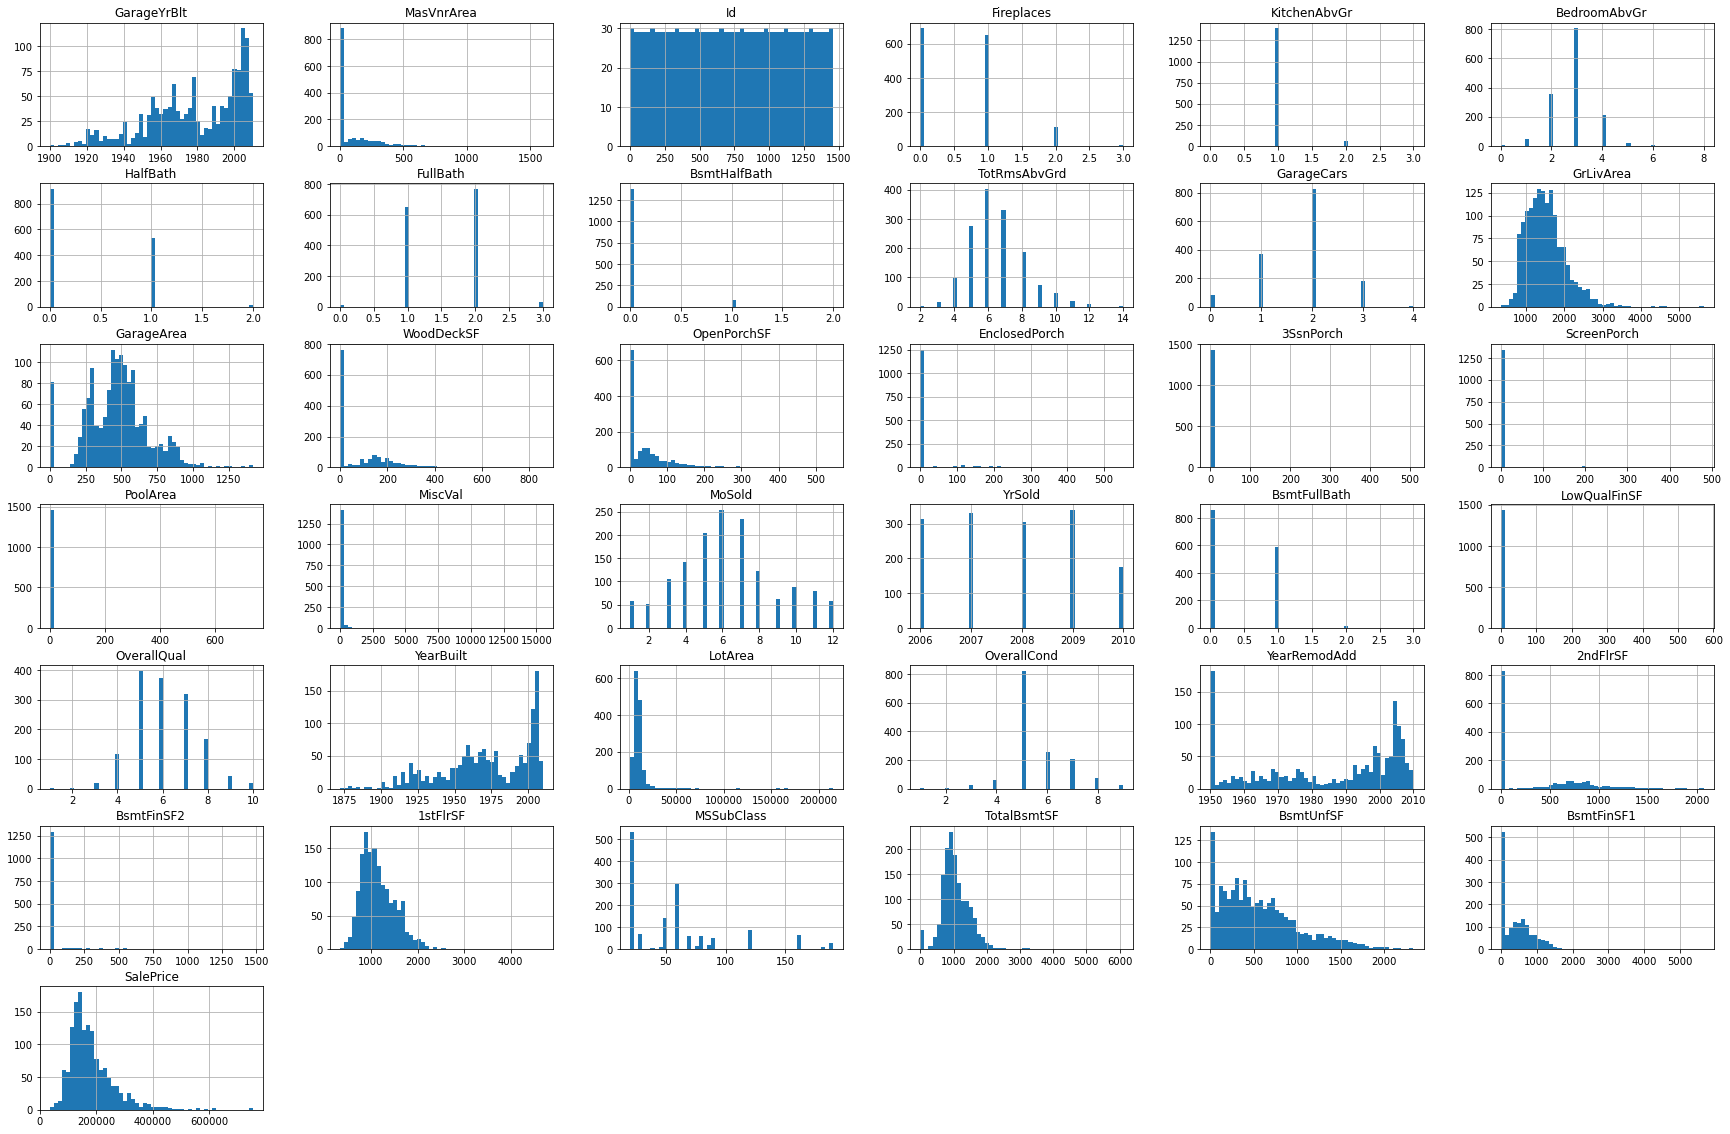

In [8]:
df_houses_clean.hist(bins = 50, figsize = (30, 20));

En el caso de las **variables numéricas** vamos a ver una descripción rápida de cada una de ellas. En concreto, la media, la desviación estándar, el valor mínimo, el valor máximo y los cuartiles de cada variable.

In [9]:
df_houses_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.0,1.00,3.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,2.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0


**4.2.Análisis multivariante**

Nos interesa conocer qué conjuntos de variables están relacionadas entre sí. Para ello vamos a calcular la matriz de correlación entre las variables.

<AxesSubplot:>

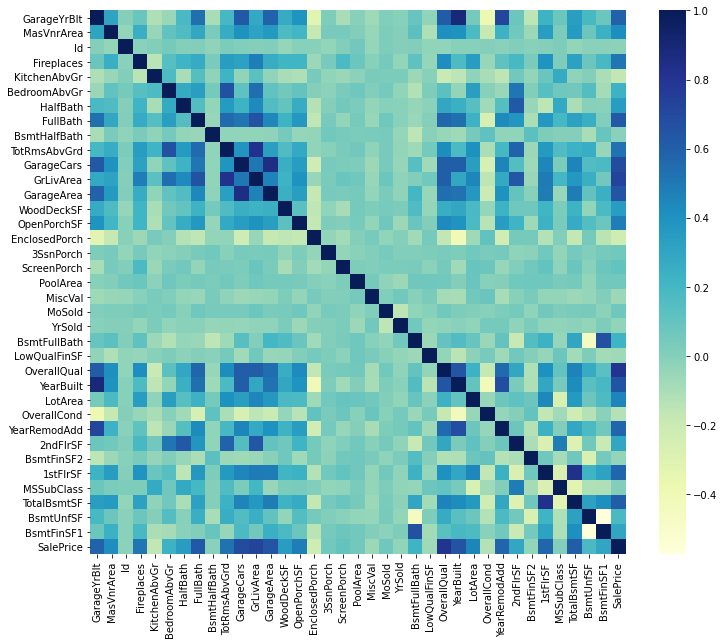

In [16]:
corrmat = df_houses_clean.corr(method = 'spearman')
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corrmat, ax = ax, cmap = 'YlGnBu')

Vamos a escoger las 8 variables mas correlacionadas con el precio de venta, que es nuestra variable dependiente.

<AxesSubplot:>

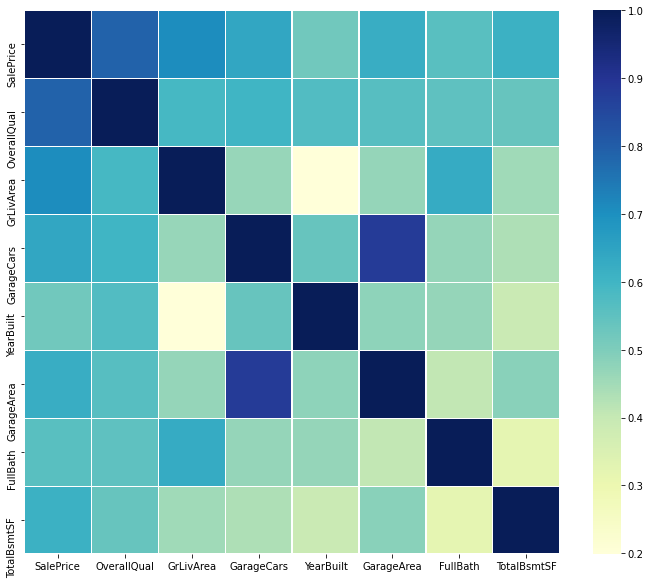

In [20]:
k = 8 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_houses_clean[cols].values.T)
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

**5. CONTRASTE DE HIPÓTESIS**

Vamos a determinar si los precios de las casas están por encima de la media o no. Para ello vamos a establecer nuestras hipótesis nula y alternativa.

    H0 = los precios están dentro de la media o por debajo
    H1 = los precios están por encima de la media

Primero vamos a determinar si la variable SalePrice presenta una distribución normal mediante el test de normalidad de Shapiro.

In [24]:
from scipy.stats import shapiro

alpha=0.05


stat, pval = shapiro(df_houses_clean['SalePrice'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
    

if pval > alpha:
    print('La variable SalePrice está distribuida normalmente.')
if pval < alpha:
    print('La variable SalePrice no está distribuida normalmente.')

Statistic: 0.870
P-Value: 0.00000000000000000000
La variable SalePrice no está distribuida normalmente.


Vemos que la variable SalePrice no está distribuída normalmente.

Vamos a crear dos grupos: uno incluyendo los precios menores o iguales a la media y otro con los precios mayores a la media.

In [39]:
menor_media = df_houses_clean[df_houses_clean['SalePrice'].values <= df_houses_clean['SalePrice'].mean()]

In [40]:
menor_media

,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
3,1998.0,TA,Detchd,Unf,TA,Unf,No,TA,Gd,ALQ,...,540,216,Gable,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg,140000
5,1993.0,TA,Attchd,Unf,TA,Unf,No,Gd,TA,GLQ,...,64,732,Gable,Wood,TA,TA,VinylSd,VinylSd,CompShg,143000
8,1931.0,TA,Detchd,Unf,Fa,Unf,No,TA,TA,Unf,...,952,0,Gable,BrkTil,TA,TA,Wd Shng,BrkFace,CompShg,129900
9,1939.0,TA,Attchd,RFn,Gd,Unf,No,TA,TA,GLQ,...,140,851,Gable,BrkTil,TA,TA,MetalSd,MetalSd,CompShg,118000
10,1965.0,TA,Detchd,Unf,TA,Unf,No,TA,TA,Rec,...,134,906,Hip,CBlock,TA,TA,HdBoard,HdBoard,CompShg,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2005.0,TA,Basment,Fin,TA,Unf,Gd,Gd,TA,GLQ,...,0,547,Gable,PConc,TA,TA,VinylSd,VinylSd,CompShg,145000
1453,NaN,NaN,NaN,NaN,NaN,Unf,No,Gd,TA,Unf,...,1140,0,Gable,PConc,TA,TA,VinylSd,VinylSd,CompShg,84500
1455,1999.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,Unf,...,953,0,Gable,PConc,TA,TA,VinylSd,VinylSd,CompShg,175000
1458,1950.0,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,GLQ,...,0,49,Hip,CBlock,TA,TA,MetalSd,MetalSd,CompShg,142125


In [41]:
mayor_media = df_houses_clean[df_houses_clean['SalePrice'].values > df_houses_clean['SalePrice'].mean()]

In [42]:
mayor_media

,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,2003.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,...,150,706,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,208500
1,1976.0,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,ALQ,...,284,978,Gable,CBlock,TA,TA,MetalSd,MetalSd,CompShg,181500
2,2001.0,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,GLQ,...,434,486,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,223500
4,2000.0,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,GLQ,...,490,655,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,250000
6,2004.0,TA,Attchd,RFn,TA,Unf,Av,Ex,TA,GLQ,...,317,1369,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1995.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,...,141,1079,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,240000
1451,2008.0,TA,Attchd,Fin,TA,Unf,No,Gd,TA,Unf,...,1573,0,Gable,PConc,TA,Gd,CmentBd,CemntBd,CompShg,287090
1454,2004.0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,...,811,410,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg,185000
1456,1978.0,TA,Attchd,Unf,TA,Rec,No,Gd,TA,ALQ,...,589,790,Gable,CBlock,TA,TA,Plywood,Plywood,CompShg,210000


Text(0, 0.5, 'Frecuencia')

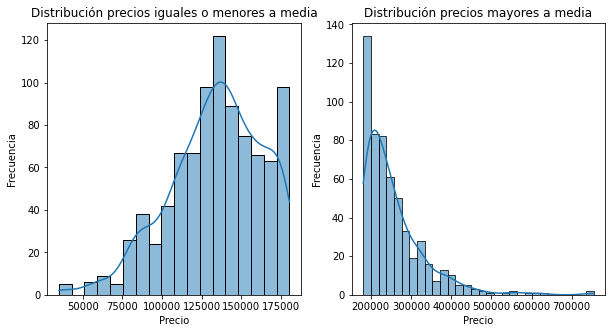

In [43]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.histplot(menor_media['SalePrice'], kde=True)
plt.title("Distribución precios iguales o menores a media")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
sns.histplot(mayor_media['SalePrice'], kde=True)
plt.title("Distribución precios mayores a media")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

In [48]:
effect = np.mean(mayor_media['SalePrice']) - np.mean(menor_media['SalePrice'])
sigma_first = np.std(mayor_media['SalePrice'])
sigma_third = np.std(menor_media['SalePrice'])
sigma_difference = np.sqrt((sigma_first**2)/len(mayor_media['SalePrice'])  +  (sigma_third**2)/len(menor_media['SalePrice']))
z_score = effect / sigma_difference

In [49]:
z_score

35.628304649900535

In [50]:
from scipy.stats import norm

p_value = norm.sf(abs(z_score))*2
p_value

5.10842811441842e-278

In [52]:
from scipy import stats

stats.ttest_ind(mayor_media['SalePrice'], menor_media['SalePrice'], equal_var = False)

Ttest_indResult(statistic=35.59746124310273, pvalue=1.1194450835641918e-155)

**6. CONCLUSIÓN**

Dado que el valor obtenido para p_value es muy bajo, rechazamos la hipótesis nula con un nivel de significancia del 5%. Esto significa que los precios de venta se encuentran por encima de la media.